<a href="https://colab.research.google.com/github/AmirMohammadSaffar/FUNDAMENTAL-OF-INTELLIGENT-SYSTEMS/blob/main/mini_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅**Question #1**


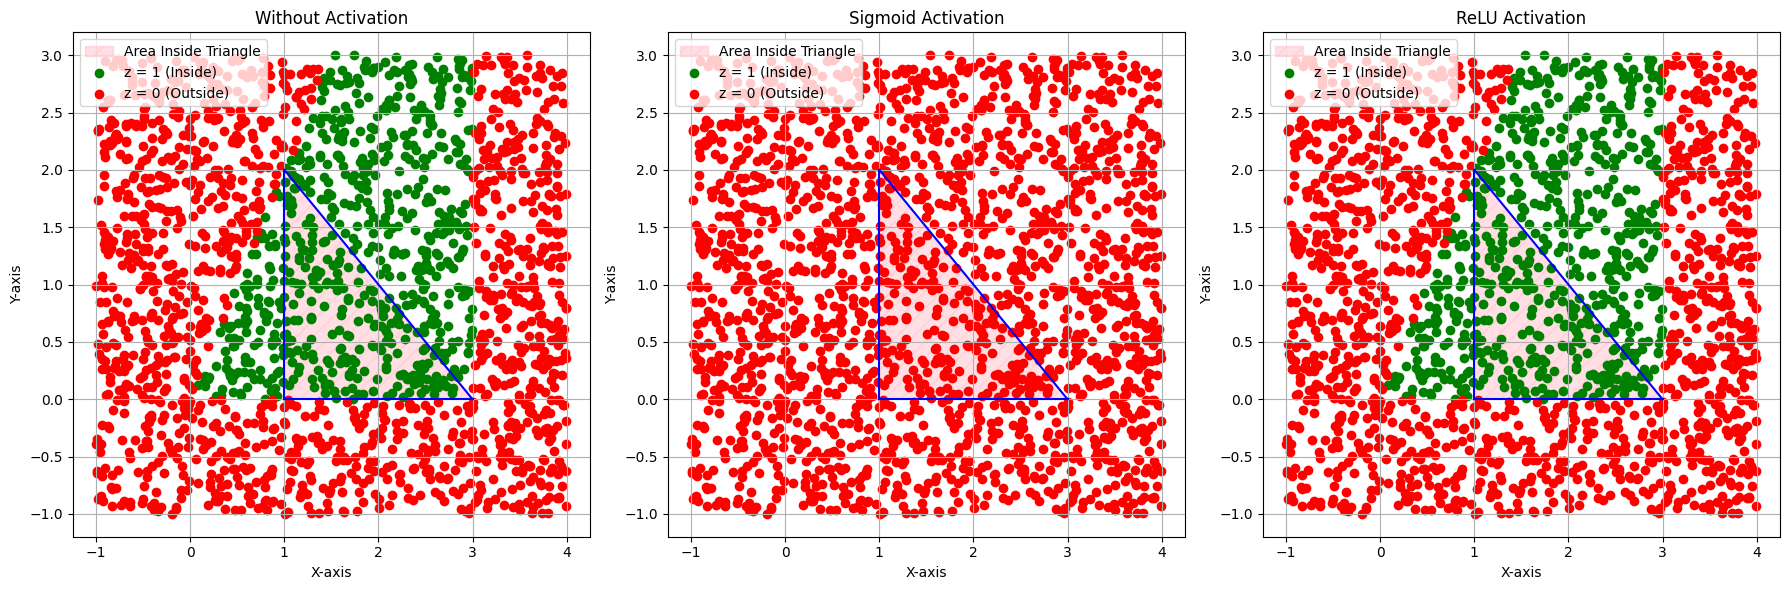

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class McCullochPittsNeuron:
    def __init__(self, weights, threshold, activation=None):
        self.weights = weights
        self.threshold = threshold
        self.activation = activation

    def model(self, inputs):
        weighted_sum = np.dot(self.weights, inputs) - self.threshold
        if self.activation:
            return self.activation(weighted_sum)
        return 1 if weighted_sum >= 0 else 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# Define the triangle classification network
def classify_point(x, y, activation=None):
    neuron1 = McCullochPittsNeuron([1, -0.5], 0, activation=activation)  # Line y = 0.5x
    neuron2 = McCullochPittsNeuron([-1, 0], -3, activation=activation)   # Line x = 3
    neuron3 = McCullochPittsNeuron([0, 1], 0, activation=activation)     # Line y = 0

    # Outputs for each line
    z1 = neuron1.model([x, y])
    z2 = neuron2.model([x, y])
    z3 = neuron3.model([x, y])

    # Point is inside if all conditions are met
    if activation is None:
        return 1 if z1 == 1 and z2 == 1 and z3 == 1 else 0
    else:
        return z1 * z2 * z3

np.random.seed(0)
num_points = 2000
x_values = np.random.uniform(-1, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

# Classify points without activation, with sigmoid, and with ReLU
results = {
    "no_activation": {"inside": [], "outside": []},
    "sigmoid": {"inside": [], "outside": []},
    "relu": {"inside": [], "outside": []},
}

for x, y in zip(x_values, y_values):
    # Without activation
    if classify_point(x, y) == 1:
        results["no_activation"]["inside"].append((x, y))
    else:
        results["no_activation"]["outside"].append((x, y))
    # With sigmoid activation
    if classify_point(x, y, activation=sigmoid) > 0.5:  # Threshold
        results["sigmoid"]["inside"].append((x, y))
    else:
        results["sigmoid"]["outside"].append((x, y))
    # With ReLU activation
    if classify_point(x, y, activation=relu) > 0:  # Threshold
        results["relu"]["inside"].append((x, y))
    else:
        results["relu"]["outside"].append((x, y))

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

activations = ["no_activation", "sigmoid", "relu"]
titles = ["Without Activation", "Sigmoid Activation", "ReLU Activation"]

for i, ax in enumerate(axes):
    activation = activations[i]
    inside_x, inside_y = zip(*results[activation]["inside"]) if results[activation]["inside"] else ([], [])
    outside_x, outside_y = zip(*results[activation]["outside"]) if results[activation]["outside"] else ([], [])


    triangle_x = [1, 3, 1]
    triangle_y = [0, 0, 2]
    ax.fill(triangle_x, triangle_y, color='pink', alpha=0.5, hatch='//', label='Area Inside Triangle')

    ax.scatter(inside_x, inside_y, color='green', label='z = 1 (Inside)')
    ax.scatter(outside_x, outside_y, color='red', label='z = 0 (Outside)')

    ax.plot([1, 3], [0, 0], color='blue')  # Line CB
    ax.plot([3, 1], [0, 2], color='blue')  # Line AB
    ax.plot([1, 1], [0, 2], color='blue')  # Line CA

    ax.set_title(titles[i])
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


✅**Question #2**


In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1dLXXpGDy6ID9cHV9xLoB0_6fyDFjrS8i


Downloading...
From: https://drive.google.com/uc?id=1dLXXpGDy6ID9cHV9xLoB0_6fyDFjrS8i
To: /content/teleCust1000t.csv
100% 37.0k/37.0k [00:00<00:00, 76.9MB/s]


✅**Question #2-part 1 & 2**


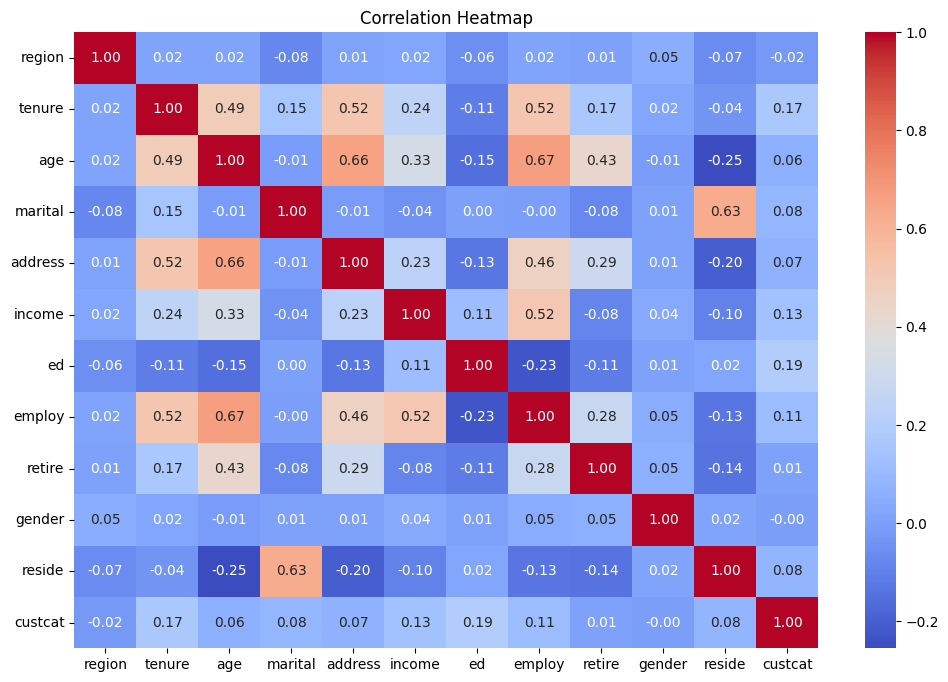

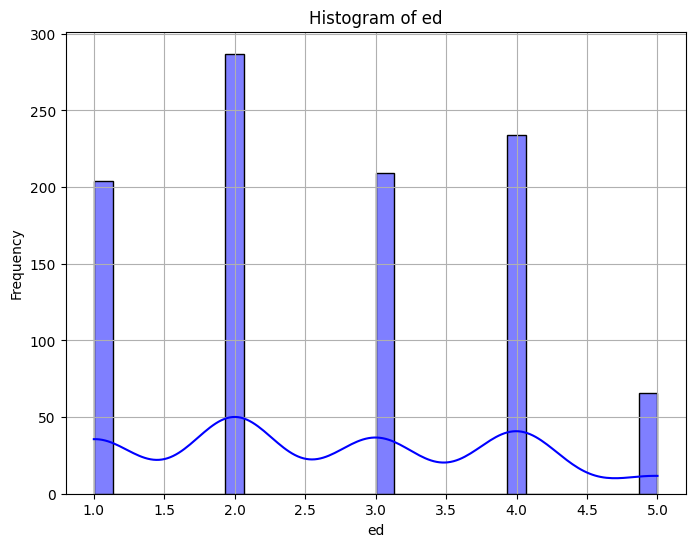

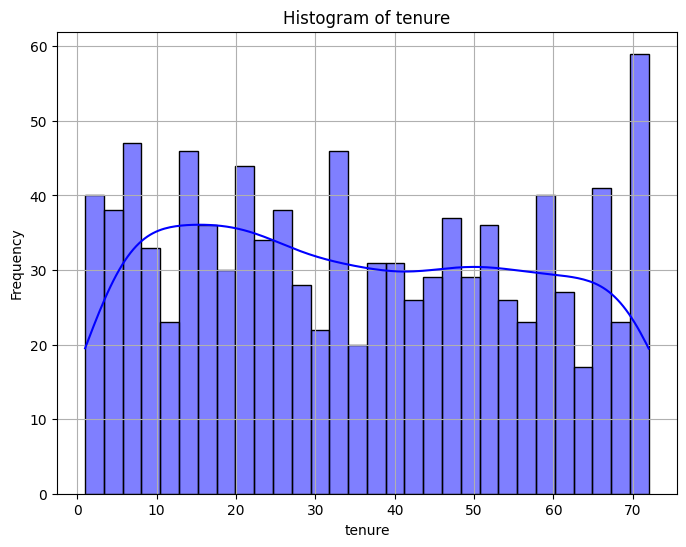

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'teleCust1000t.csv'
data = pd.read_csv(file_path)

if data['custcat'].dtype == 'object':
    data['custcat'] = pd.factorize(data['custcat'])[0]

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

target_field = 'custcat'
correlation_with_target = correlation_matrix[target_field].drop(target_field)
most_correlated_features = correlation_with_target.abs().sort_values(ascending=False).head(2).index.tolist()

for feature in most_correlated_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


✅**Question #2-part 3**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


file_path = 'teleCust1000t.csv'
data = pd.read_csv(file_path)


target_field = 'custcat'


X = data.drop(columns=[target_field])
y = data[target_field]


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training Set: {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Test Set: {X_test.shape[0]} samples")


Training Set: 600 samples
Validation Set: 200 samples
Test Set: 200 samples


✅**Question #2-part 4**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

file_path = 'teleCust1000t.csv'
data = pd.read_csv(file_path)

target_field = 'custcat'
X = data.drop(columns=[target_field])
y = pd.get_dummies(data[target_field])

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def create_one_hidden_layer_model(num_neurons):
    """
    Creates an MLP model with one hidden layer.
    :param num_neurons: Number of neurons in the hidden layer
    """
    model = Sequential([
        Dense(num_neurons, activation='relu', input_shape=(X_train.shape[1],)),  # One hidden layer
        Dense(y_train.shape[1], activation='softmax')  # Output layer
    ])
    model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models with different numbers of neurons
for neurons in [32, 64]:  # At least two configurations
    print(f"Training model with {neurons} neurons in one hidden layer")
    model = create_one_hidden_layer_model(neurons)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)
    print(f"Validation Accuracy with {neurons} neurons: {max(history.history['val_accuracy'])}")

# Part 2: Add BatchNormalization to the model
def create_batch_norm_model(num_neurons):
    """
    Creates an MLP model with one hidden layer and BatchNormalization.
    :param num_neurons: Number of neurons in the hidden layer
    """
    model = Sequential([
        Dense(num_neurons, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models with BatchNormalization
for neurons in [32, 64]:
    print(f"Training model with BatchNormalization and {neurons} neurons")
    model = create_batch_norm_model(neurons)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)
    print(f"Validation Accuracy with BatchNormalization and {neurons} neurons: {max(history.history['val_accuracy'])}")

# Part 3: Add Dropout to the best model
def create_dropout_model(num_neurons, dropout_rate=0.5):
    """
    Creates an MLP model with one hidden layer, BatchNormalization, and Dropout.
    :param num_neurons: Number of neurons in the hidden layer
    :param dropout_rate: Dropout rate
    """
    model = Sequential([
        Dense(num_neurons, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models with Dropout
for neurons in [32, 64]:  # Based on previous best models
    print(f"Training model with Dropout and {neurons} neurons")
    model = create_dropout_model(neurons, dropout_rate=0.5)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)
    print(f"Validation Accuracy with Dropout and {neurons} neurons: {max(history.history['val_accuracy'])}")

# Part 4: Add L2 Regularization to the best models
def create_l2_regularized_model(num_neurons, l2_rate=0.0001):
    """
    Creates an MLP model with one hidden layer, BatchNormalization, Dropout, and L2 Regularization.
    :param num_neurons: Number of neurons in the hidden layer
    :param l2_rate: L2 regularization rate
    """
    model = Sequential([
        Dense(num_neurons, activation='relu', kernel_regularizer=l2(l2_rate), input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models with L2 Regularization
for neurons in [32, 64]:  # Based on previous best models
    print(f"Training model with L2 Regularization and {neurons} neurons")
    model = create_l2_regularized_model(neurons, l2_rate=0.0001)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)
    print(f"Validation Accuracy with L2 Regularization and {neurons} neurons: {max(history.history['val_accuracy'])}")


Training model with 32 neurons in one hidden layer
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2029 - loss: 1.4520 - val_accuracy: 0.1950 - val_loss: 1.4479
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2237 - loss: 1.4236 - val_accuracy: 0.2000 - val_loss: 1.4336
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2247 - loss: 1.4121 - val_accuracy: 0.1950 - val_loss: 1.4232
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2615 - loss: 1.4033 - val_accuracy: 0.2050 - val_loss: 1.4154
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2615 - loss: 1.4073 - val_accuracy: 0.2100 - val_loss: 1.4096
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2672 - loss: 1.3885 - val_accuracy: 0.2250 - val_loss: 1.4049
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2460 - loss: 1.3964 - val_accuracy: 0.2400 - val_loss: 1.4011
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2768 - loss: 1.3877 - val_accuracy: 0.2700 - val_loss: 1.3982
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3303 - loss: 1.3712 - val_accuracy: 0.3250 - val_loss: 1.3733
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3144 - loss: 1.3728 - val_accuracy: 0.3250 - val_loss: 1.3725
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3345 - loss: 1.3706 - val_accuracy: 0.3200 - val_loss: 1.3718
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3292 - loss: 1.3729 - val_accuracy: 0.3200 - val_loss: 1.3710
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3114 - loss: 1.3725 - val_accuracy: 0.3300 - val_loss: 1.3704
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3174 - loss: 1.3725 - val_accuracy: 0.3400 - val_loss: 1.3697
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3473 - loss: 1.3582 - val_accuracy: 0.3400 - val_loss: 1.3690
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3309 - loss: 1.3643 - val_accuracy: 0.3550 - val_loss: 1.3682
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2090 - loss: 2.0710 - val_accuracy: 0.2900 - val_loss: 1.4074
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2427 - loss: 1.7024 - val_accuracy: 0.3250 - val_loss: 1.3904
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2747 - loss: 1.5642 - val_accuracy: 0.3150 - val_loss: 1.3779
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3007 - loss: 1.4865 - val_accuracy: 0.3400 - val_loss: 1.3661
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3312 - loss: 1.3985 - val_accuracy: 0.3400 - val_loss: 1.3560
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3284 - loss: 1.3290 - val_accuracy: 0.3450 - val_loss: 1.3470
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3716 - loss: 1.3104 - val_accuracy: 0.3450 - val_loss: 1.3375
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3689 - loss: 1.3074 - val_accuracy: 0.3550 - val_loss: 1.3297
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2791 - loss: 1.8566 - val_accuracy: 0.3100 - val_loss: 1.3715
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2896 - loss: 1.5353 - val_accuracy: 0.3050 - val_loss: 1.3640
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3360 - loss: 1.3913 - val_accuracy: 0.3250 - val_loss: 1.3580
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3893 - loss: 1.2949 - val_accuracy: 0.3350 - val_loss: 1.3545
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4188 - loss: 1.2708 - val_accuracy: 0.3550 - val_loss: 1.3499
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4650 - loss: 1.2100 - val_accuracy: 0.3900 - val_loss: 1.3471
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4516 - loss: 1.1968 - val_accuracy: 0.3950 - val_loss: 1.3432
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4402 - loss: 1.2189 - val_accuracy: 0.3900 - val_loss: 1.3391
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2419 - loss: 2.0964 - val_accuracy: 0.2850 - val_loss: 1.4010
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2687 - loss: 1.8727 - val_accuracy: 0.2900 - val_loss: 1.3897
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2630 - loss: 1.8162 - val_accuracy: 0.3100 - val_loss: 1.3812
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2791 - loss: 1.6978 - val_accuracy: 0.3100 - val_loss: 1.3739
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2326 - loss: 1.7199 - val_accuracy: 0.3200 - val_loss: 1.3670
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2843 - loss: 1.5868 - val_accuracy: 0.3250 - val_loss: 1.3623
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3300 - loss: 1.5083 - val_accuracy: 0.3300 - val_loss: 1.3565
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3301 - loss: 1.5023 - val_accuracy: 0.3300 - val_loss: 1.3502
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2492 - loss: 2.1349 - val_accuracy: 0.2950 - val_loss: 1.3620
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2715 - loss: 1.8088 - val_accuracy: 0.3200 - val_loss: 1.3575
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2705 - loss: 1.7160 - val_accuracy: 0.3600 - val_loss: 1.3542
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3084 - loss: 1.6062 - val_accuracy: 0.3800 - val_loss: 1.3497
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3087 - loss: 1.5451 - val_accuracy: 0.3700 - val_loss: 1.3472
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3745 - loss: 1.3982 - val_accuracy: 0.3850 - val_loss: 1.3426
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3847 - loss: 1.4061 - val_accuracy: 0.4050 - val_loss: 1.3368
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3627 - loss: 1.3891 - val_accuracy: 0.3950 - val_loss: 1.3347
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2737 - loss: 1.9830 - val_accuracy: 0.2600 - val_loss: 1.4047
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2708 - loss: 1.7761 - val_accuracy: 0.3050 - val_loss: 1.3947
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3281 - loss: 1.5823 - val_accuracy: 0.3050 - val_loss: 1.3883
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3129 - loss: 1.5622 - val_accuracy: 0.3150 - val_loss: 1.3803
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2926 - loss: 1.5865 - val_accuracy: 0.3150 - val_loss: 1.3738
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3418 - loss: 1.4790 - val_accuracy: 0.3100 - val_loss: 1.3679
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3144 - loss: 1.4506 - val_accuracy: 0.3450 - val_loss: 1.3609
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3915 - loss: 1.3810 - val_accuracy: 0.3500 - val_loss: 1.3527
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2224 - loss: 2.3740 - val_accuracy: 0.2800 - val_loss: 1.4268
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2523 - loss: 2.0018 - val_accuracy: 0.3150 - val_loss: 1.3937
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2772 - loss: 1.8271 - val_accuracy: 0.3400 - val_loss: 1.3774
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3257 - loss: 1.6222 - val_accuracy: 0.3550 - val_loss: 1.3695
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2945 - loss: 1.5814 - val_accuracy: 0.3500 - val_loss: 1.3610
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3326 - loss: 1.4643 - val_accuracy: 0.3700 - val_loss: 1.3548
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3333 - loss: 1.4431 - val_accuracy: 0.3600 - val_loss: 1.3503
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3633 - loss: 1.4102 - val_accuracy: 0.3650 - val_loss: 1.3437
Ep

✅**Question #2-part Extra**



In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

file_path = 'teleCust1000t.csv'
data = pd.read_csv(file_path)

target_field = 'custcat'
X = data.drop(columns=[target_field])
y = pd.get_dummies(data[target_field])

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define training function
def train_with_optimizer(model_fn, optimizer, neurons, title):
    """
    Train a given model with a specified optimizer.
    :param model_fn: Function to create the model
    :param optimizer: Optimizer instance (Adam, RMSprop, etc.)
    :param neurons: Number of neurons in the hidden layer
    :param title: Title for the training process
    """
    model = model_fn(neurons)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    print(f"Training with {title} optimizer and {neurons} neurons...")
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)
    print(f"Validation Accuracy with {title} optimizer and {neurons} neurons: {max(history.history['val_accuracy'])}")
    return history

# Model with BatchNormalization
def create_batch_norm_model_with_optimizer(num_neurons):
    return Sequential([
        Dense(num_neurons, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dense(y_train.shape[1], activation='softmax')
    ])

# Model with L2 Regularization
def create_l2_regularized_model_with_optimizer(num_neurons, l2_rate=0.0001):
    return Sequential([
        Dense(num_neurons, activation='relu', kernel_regularizer=l2(l2_rate), input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dense(y_train.shape[1], activation='softmax')
    ])

# Train models with Adam and RMSprop
for optimizer_fn, optimizer_name in [
    (lambda: Adam(learning_rate=0.01), "Adam"),
    (lambda: RMSprop(learning_rate=0.01), "RMSprop")
]:
    # Train BatchNormalization model
    train_with_optimizer(create_batch_norm_model_with_optimizer, optimizer_fn(), 32, optimizer_name)

    # Train L2 Regularization model
    train_with_optimizer(create_l2_regularized_model_with_optimizer, optimizer_fn(), 32, optimizer_name)

# **If Adopt optimizer is available**
try:
    from tensorflow.keras.optimizers.experimental import Adafactor as Adopt
    optimizer_adopt = Adopt(learning_rate=0.01)
    # Train BatchNormalization model with Adopt
    train_with_optimizer(create_batch_norm_model_with_optimizer, optimizer_adopt, 32, "Adopt")
    # Train L2 Regularization model with Adopt
    train_with_optimizer(create_l2_regularized_model_with_optimizer, optimizer_adopt, 32, "Adopt")
except ImportError:
    print("Optimizer 'Adopt' not available in this environment.")


Training with Adam optimizer and 32 neurons...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2774 - loss: 1.5593 - val_accuracy: 0.2750 - val_loss: 1.3760
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4052 - loss: 1.2391 - val_accuracy: 0.3250 - val_loss: 1.3803
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4622 - loss: 1.1809 - val_accuracy: 0.2900 - val_loss: 1.3739
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4397 - loss: 1.1985 - val_accuracy: 0.3100 - val_loss: 1.3708
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4491 - loss: 1.1725 - val_accuracy: 0.3300 - val_loss: 1.3377
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4506 - loss: 1.1495 - val_accuracy: 0.3250 - val_loss: 1.3325
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4410 - loss: 1.1801 - val_accuracy: 0.3200 - val_loss: 1.3293
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4956 - loss: 1.1547 - val_accuracy: 0.3750 - val_loss: 1.3062
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.2469 - loss: 1.8022 - val_accuracy: 0.3550 - val_loss: 1.3474
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4180 - loss: 1.2530 - val_accuracy: 0.3000 - val_loss: 1.3640
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4542 - loss: 1.1759 - val_accuracy: 0.3200 - val_loss: 1.3535
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4417 - loss: 1.1701 - val_accuracy: 0.3700 - val_loss: 1.3403
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4914 - loss: 1.1043 - val_accuracy: 0.3600 - val_loss: 1.3376
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4843 - loss: 1.1266 - val_accuracy: 0.3800 - val_loss: 1.3371
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4369 - loss: 1.1593 - val_accuracy: 0.3350 - val_loss: 1.3347
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4354 - loss: 1.1971 - val_accuracy: 0.3650 - val_loss: 1.3

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.3143 - loss: 1.6972 - val_accuracy: 0.2650 - val_loss: 1.3717
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4236 - loss: 1.2421 - val_accuracy: 0.2900 - val_loss: 1.3763
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4172 - loss: 1.2456 - val_accuracy: 0.2250 - val_loss: 1.4013
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3937 - loss: 1.2406 - val_accuracy: 0.3600 - val_loss: 1.3391
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4296 - loss: 1.2222 - val_accuracy: 0.3350 - val_loss: 1.3365
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4683 - loss: 1.1539 - val_accuracy: 0.3400 - val_loss: 1.3522
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4570 - loss: 1.1690 - val_accuracy: 0.3000 - val_loss: 1.3546
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4329 - loss: 1.1527 - val_accuracy: 0.4050 - val_loss: 1.3085
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.3065 - loss: 1.4791 - val_accuracy: 0.3200 - val_loss: 1.3677
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4131 - loss: 1.2716 - val_accuracy: 0.2850 - val_loss: 1.3850
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4507 - loss: 1.2243 - val_accuracy: 0.3150 - val_loss: 1.3776
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4937 - loss: 1.1714 - val_accuracy: 0.3150 - val_loss: 1.3709
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4623 - loss: 1.1937 - val_accuracy: 0.2800 - val_loss: 1.3776
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5114 - loss: 1.1673 - val_accuracy: 0.3300 - val_loss: 1.3842
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4510 - loss: 1.1752 - val_accuracy: 0.3250 - val_loss: 1.3574
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4627 - loss: 1.1647 - val_accuracy: 0.3150 - val_loss: 1.3783
Ep

✅**Question #2-part 5**

In [ ]:
import random

best_model_rmsprop = create_batch_norm_model_with_optimizer(32)
best_model_adam = create_batch_norm_model_with_optimizer(32)


best_model_rmsprop.compile(optimizer=RMSprop(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
best_model_adam.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

best_model_rmsprop.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=0)
best_model_adam.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=0)


rmsprop_test_loss, rmsprop_test_accuracy = best_model_rmsprop.evaluate(X_test, y_test, verbose=0)
adam_test_loss, adam_test_accuracy = best_model_adam.evaluate(X_test, y_test, verbose=0)


print(f"RMSprop Test Accuracy: {rmsprop_test_accuracy * 100:.2f}%")
print(f"Adam Test Accuracy: {adam_test_accuracy * 100:.2f}%")


random_indices = random.sample(range(len(X_test)), 10)
X_sample = X_test[random_indices]
y_true_sample = y_test.iloc[random_indices]


y_pred_rmsprop = best_model_rmsprop.predict(X_sample)
y_pred_adam = best_model_adam.predict(X_sample)


y_pred_rmsprop_labels = y_pred_rmsprop.argmax(axis=1)
y_pred_adam_labels = y_pred_adam.argmax(axis=1)
y_true_labels = y_true_sample.values.argmax(axis=1)

print("\nRandom Samples:")
print("Index\tTrue Label\tRMSprop Prediction\tAdam Prediction")
for i, idx in enumerate(random_indices):
    print(f"{idx}\t{y_true_labels[i]}\t\t{y_pred_rmsprop_labels[i]}\t\t\t{y_pred_adam_labels[i]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RMSprop Test Accuracy: 38.50%
Adam Test Accuracy: 40.50%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

Random Samples:
Index	True Label	RMSprop Prediction	Adam Prediction
61	3		3			1
92	2		0			0
58	1		0			2
110	3		1			1
6	1		3			3
60	3		3			1
147	3		3			3
173	1		2			2
13	2		2			2
57	1		3			3


✅**Question #2-part 6**

In [ ]:
import numpy as np


y_pred_rmsprop_test = best_model_rmsprop.predict(X_test)
y_pred_adam_test = best_model_adam.predict(X_test)

ensemble_predictions = (y_pred_rmsprop_test + y_pred_adam_test) / 2


ensemble_labels = ensemble_predictions.argmax(axis=1)
y_true_labels = y_test.values.argmax(axis=1)


ensemble_accuracy = np.mean(ensemble_labels == y_true_labels)


print(f"RMSprop Test Accuracy: {rmsprop_test_accuracy * 100:.2f}%")
print(f"Adam Test Accuracy: {adam_test_accuracy * 100:.2f}%")
print(f"Ensemble Test Accuracy: {ensemble_accuracy * 100:.2f}%")

if ensemble_accuracy > max(rmsprop_test_accuracy, adam_test_accuracy):
    print("The ensemble model outperformed the individual models.")
else:
    print("The ensemble model did not outperform the individual models.")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSprop Test Accuracy: 38.50%
Adam Test Accuracy: 40.50%
Ensemble Test Accuracy: 37.00%
The ensemble model did not outperform the individual models.


✅**Question #3**



In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 15.6MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [ ]:
from PIL import Image, ImageDraw
import random

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """

    image = Image.open(path)


    draw = ImageDraw.Draw(image)


    width = image.size[0]
    height = image.size[1]


    pix = image.load()

    factor = 100

    binary_representation = []

    for i in range(width):
        for j in range(height):

            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            total_intensity = red + green + blue

            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0
                binary_representation.append(1)

            draw.point((i, j), (red, green, blue))

    del draw

    return binary_representation

In [ ]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """

    image = Image.open(input_path)


    draw = ImageDraw.Draw(image)

    width = image.size[0]
    height = image.size[1]

    pix = image.load()

    noise_factor = 10000000

    for i in range(width):
        for j in range(height):

            rand = random.randint(-noise_factor, noise_factor)


            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand


            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

               draw.point((i, j), (red, green, blue))

    image.save(output_path, "JPEG")


    del draw

generateNoisyImages()


Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


کد بهبود یافته

In [ ]:
import numpy as np
from PIL import Image
import random

def convert_image_to_binary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        np.ndarray: A binary representation of the image (-1 for white, 1 for black).
    """
    image = Image.open(path).convert('L')
    image_array = np.array(image)


    threshold = 128


    binary_representation = np.where(image_array > threshold, -1, 1)

    return binary_representation

def add_noise_to_image(input_path, output_path, noise_level=50):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
        noise_level (int): The level of noise to add to the image (default: 50).
    """

    image = Image.open(input_path)
    image_array = np.array(image, dtype=np.float32)

    noise = np.random.randint(-noise_level, noise_level, image_array.shape, dtype=np.int16)


    noisy_image_array = np.clip(image_array + noise, 0, 255).astype(np.uint8)


    noisy_image = Image.fromarray(noisy_image_array)


    noisy_image.save(output_path, "JPEG")

def generate_noisy_images():
    """
    Generate noisy versions of predefined images and save them.
    """
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        add_noise_to_image(image_path, noisy_image_path, noise_level=50)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")


part #2

Noise Level: 0.00


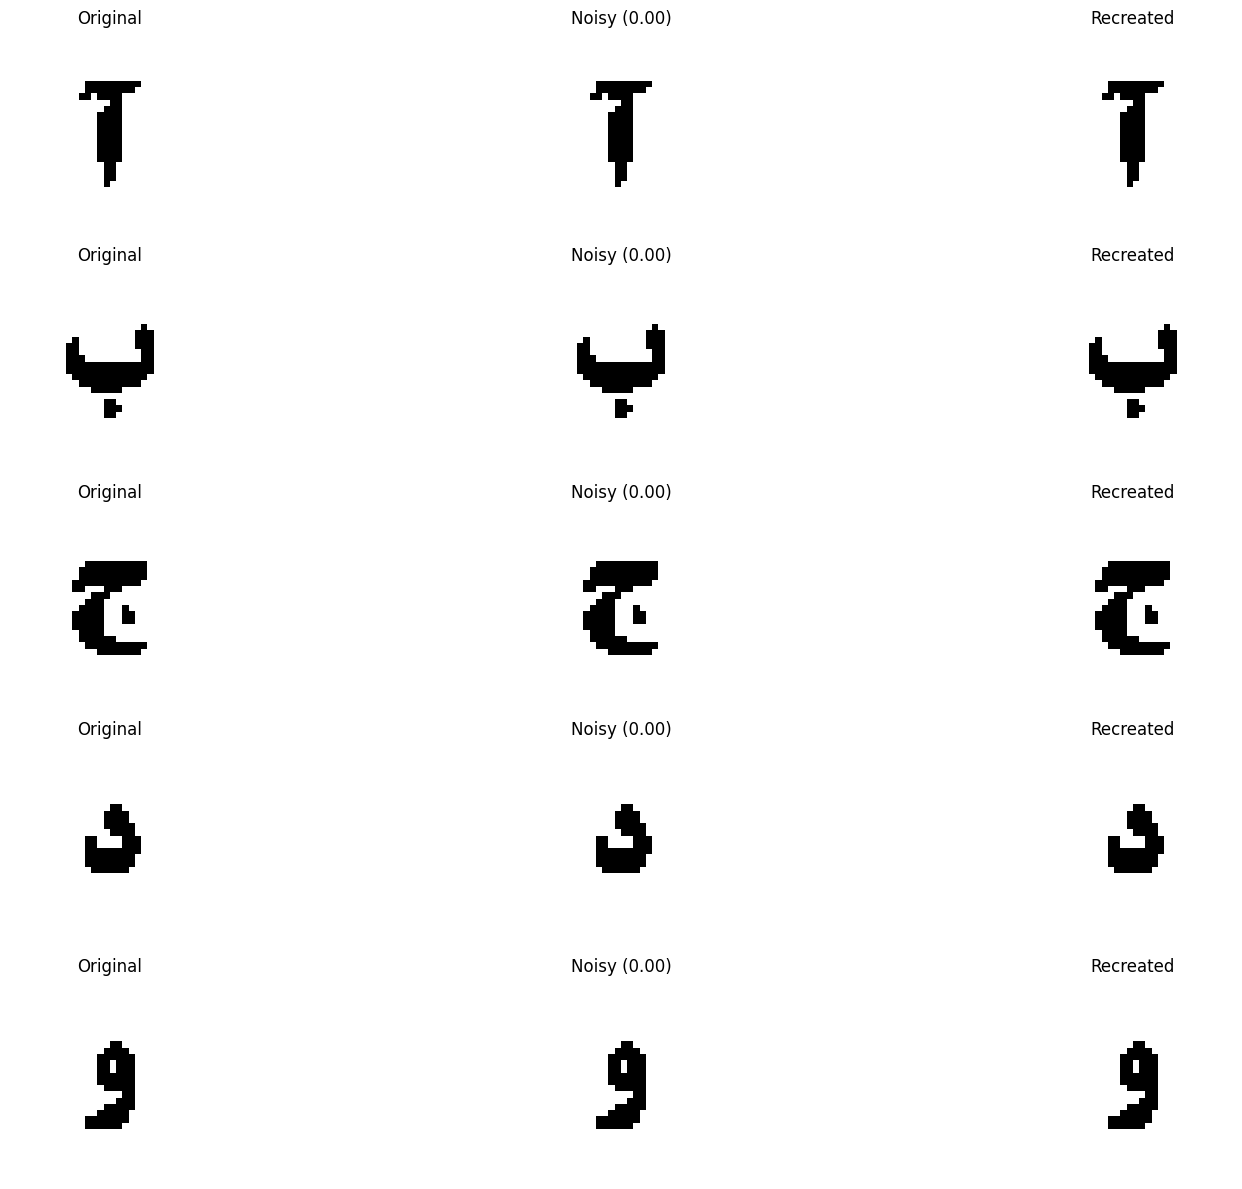

Noise Level: 0.17


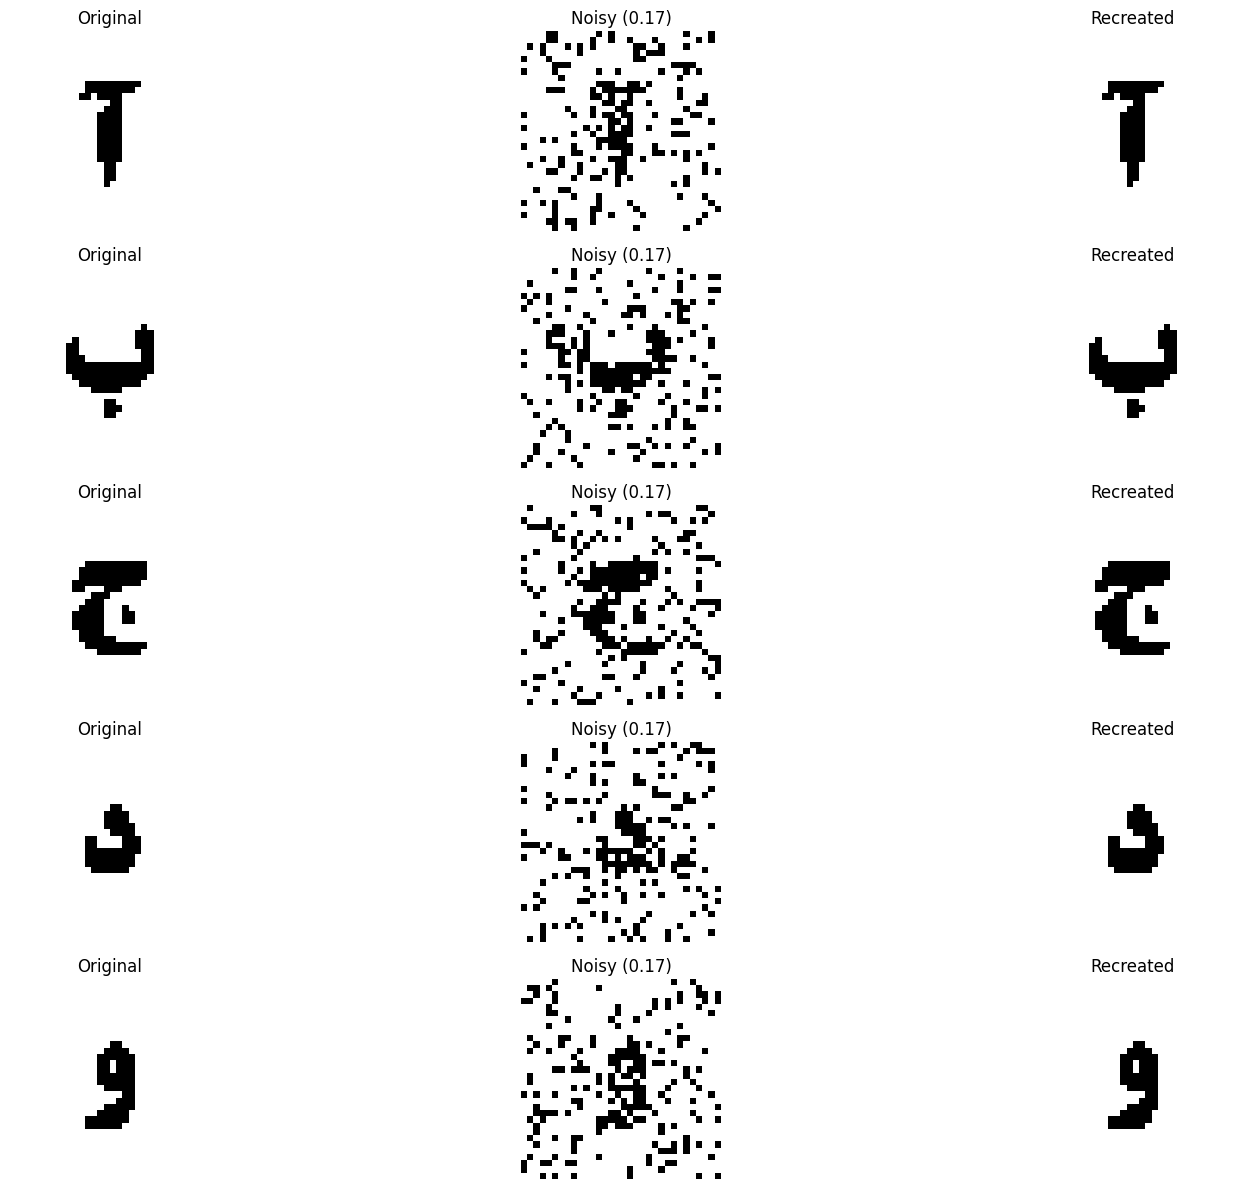

Noise Level: 0.33


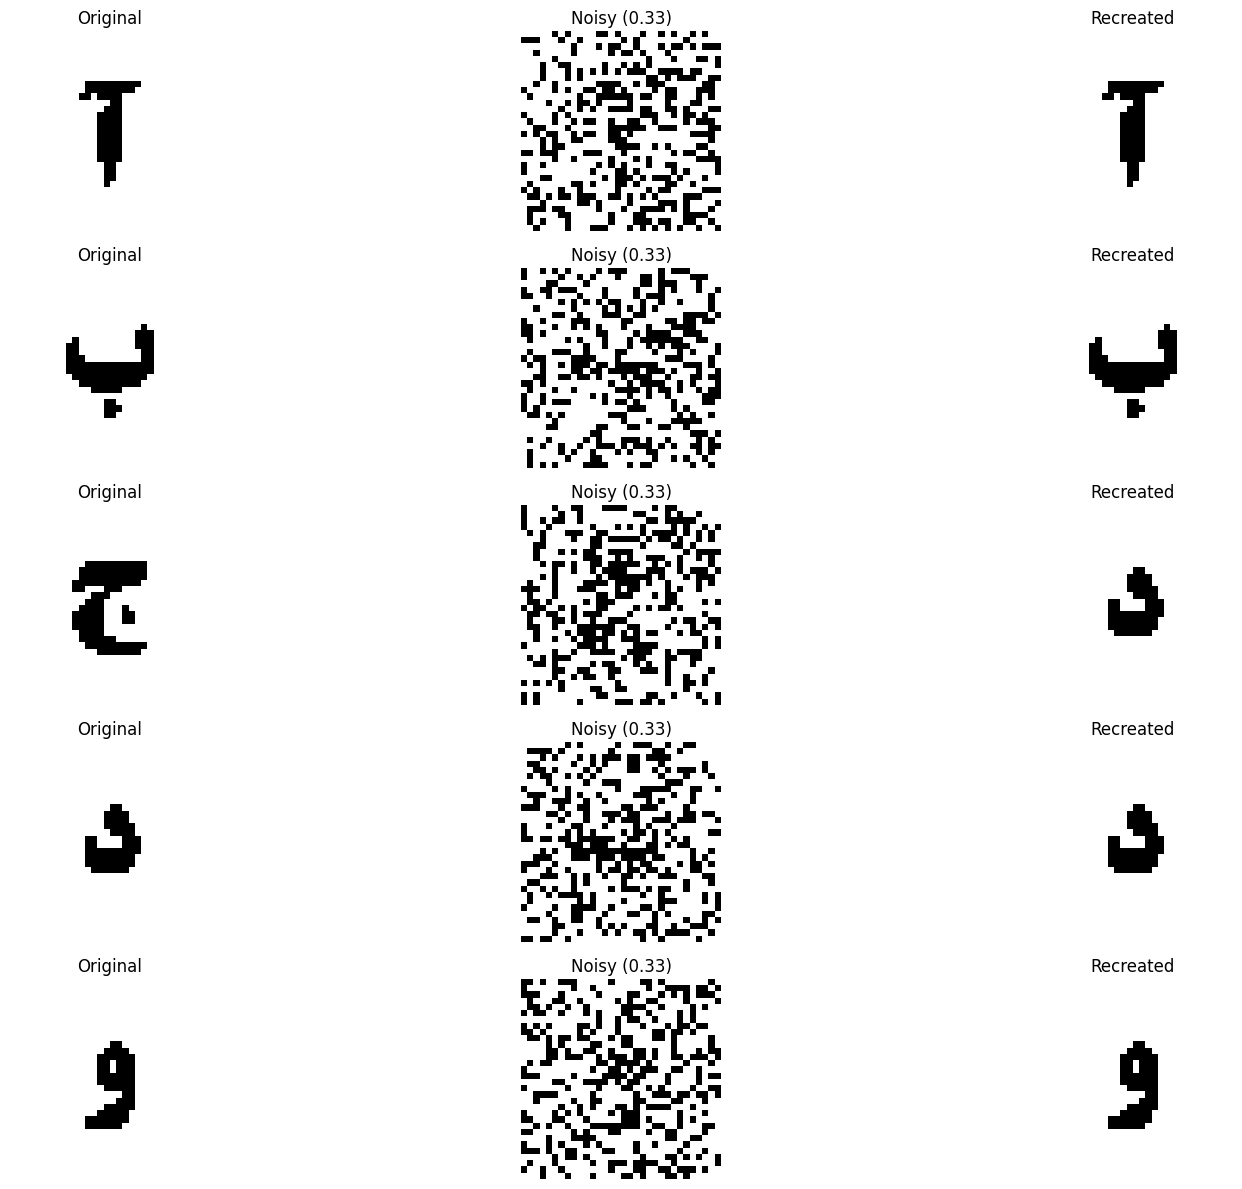

Noise Level: 0.50


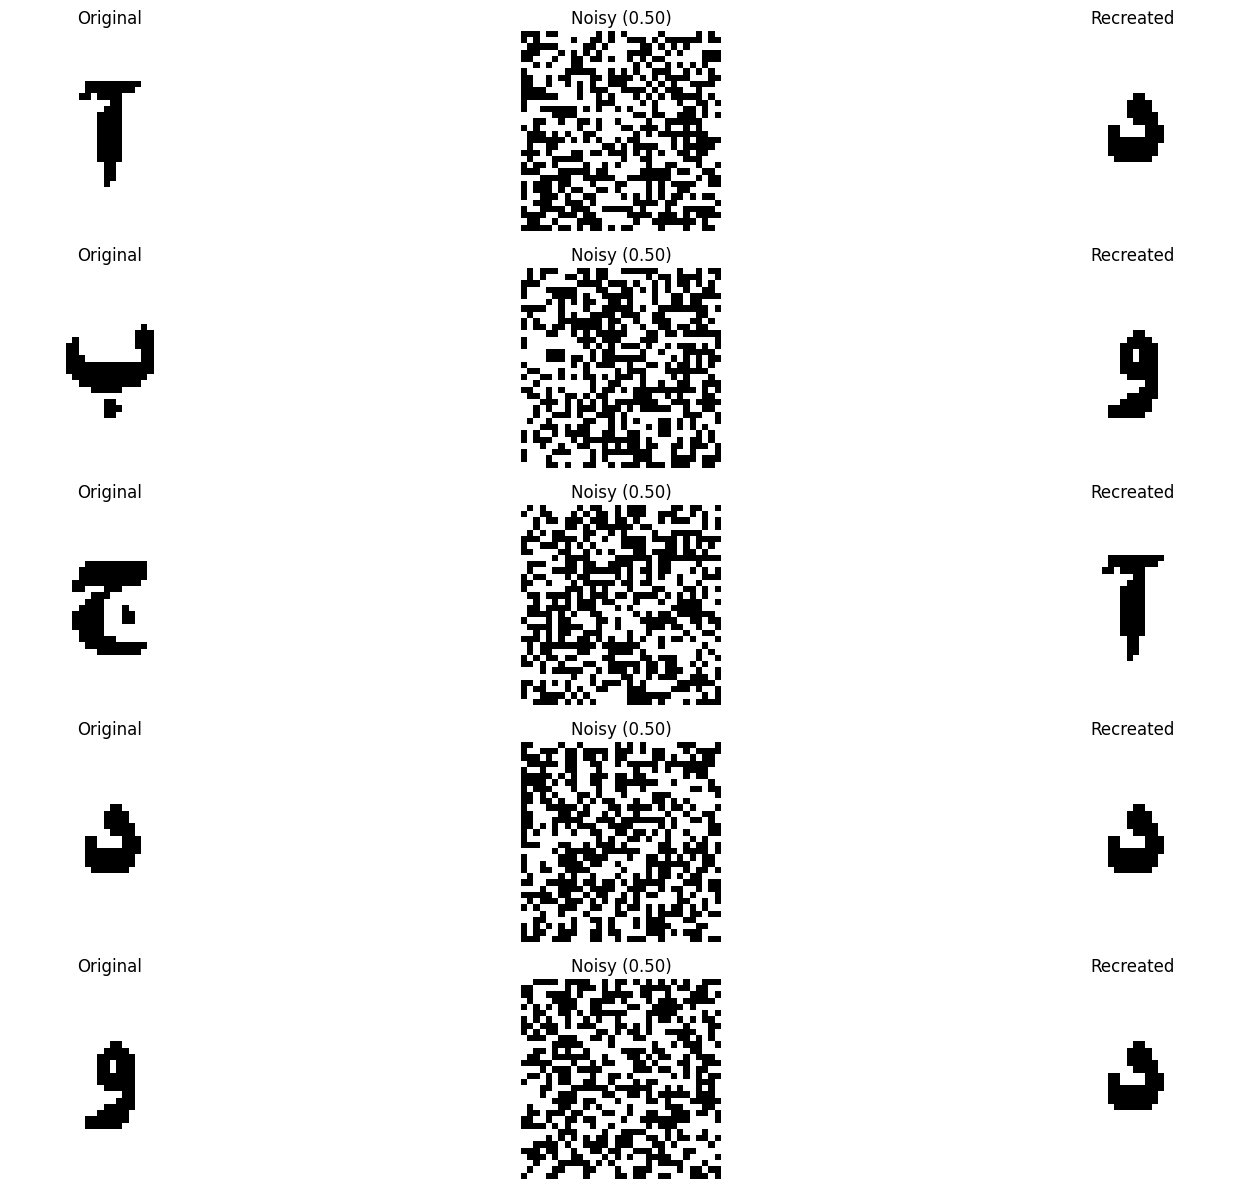

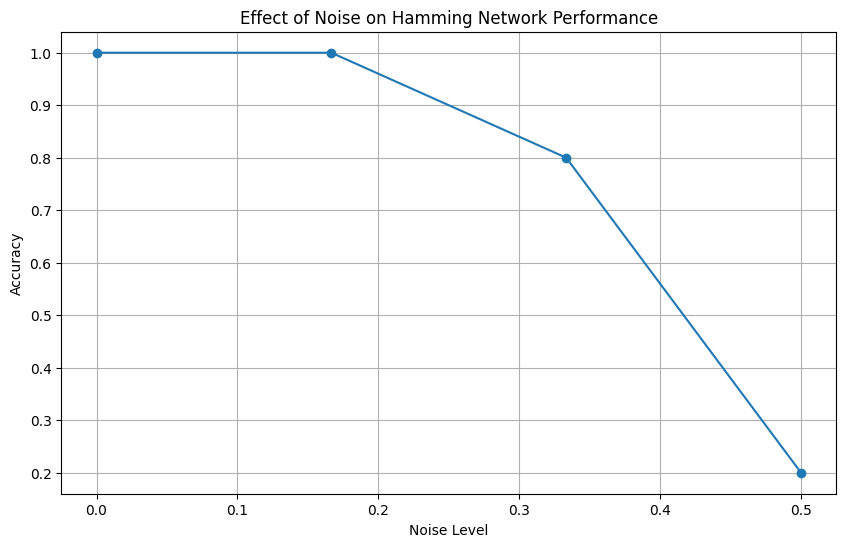

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def convert_image_to_binary(image_path):
    image = Image.open(image_path).convert("L")
    image = image.resize((32, 32))
    image_array = np.array(image)
    binary_image = np.where(image_array > 128, 1, -1)
    return binary_image


def add_noise(binary_image, noise_level):
    noisy_image = binary_image.copy()
    num_noisy_pixels = int(noise_level * binary_image.size)
    indices = np.random.choice(binary_image.size, num_noisy_pixels, replace=False)
    noisy_image.flat[indices] *= -1
    return noisy_image


class HammingNetwork:
    def __init__(self, patterns):
        self.patterns = patterns
        self.num_patterns, self.size = patterns.shape
        self.weights = self._train()

    def _train(self):
        weights = self.patterns / 2 + 0.5
        return weights

    def recall(self, noisy_pattern):
        normalized_noisy_pattern = noisy_pattern / 2 + 0.5
        similarity = np.dot(self.weights, normalized_noisy_pattern)
        max_index = np.argmax(similarity)
        return self.patterns[max_index]


image_paths = [
    "/content/1.jpg",
    "/content/2.jpg",
    "/content/3.jpg",
    "/content/4.jpg",
    "/content/5.jpg"
]
binary_images = np.array([convert_image_to_binary(path).flatten() for path in image_paths])


hamming_net = HammingNetwork(binary_images)

# Noise levels to test
noise_levels = np.linspace(0, 0.5, 4)  # Noise levels: 0%, 16.7%, 33.3%, 50%
accuracies = []

for noise_level in noise_levels:
    print(f"Noise Level: {noise_level:.2f}")


    correct_retrievals = 0


    plt.figure(figsize=(18, 12))

    for i, original_image in enumerate(binary_images):

        noisy_image = add_noise(original_image, noise_level)
        recovered_image = hamming_net.recall(noisy_image)


        if np.array_equal(recovered_image, original_image):
            correct_retrievals += 1


        original_image_reshaped = original_image.reshape(32, 32)
        noisy_image_reshaped = noisy_image.reshape(32, 32)
        recovered_image_reshaped = recovered_image.reshape(32, 32)


        plt.subplot(len(binary_images), 3, i * 3 + 1)
        plt.title("Original")
        plt.imshow(original_image_reshaped, cmap="gray")
        plt.axis("off")

        plt.subplot(len(binary_images), 3, i * 3 + 2)
        plt.title(f"Noisy ({noise_level:.2f})")
        plt.imshow(noisy_image_reshaped, cmap="gray")
        plt.axis("off")

        plt.subplot(len(binary_images), 3, i * 3 + 3)
        plt.title("Recreated")
        plt.imshow(recovered_image_reshaped, cmap="gray")
        plt.axis("off")


    accuracy = correct_retrievals / len(binary_images)
    accuracies.append(accuracy)


    plt.tight_layout()
    plt.show()


plt.figure(figsize=(10, 6))
plt.plot(noise_levels, accuracies, marker='o')
plt.title("Effect of Noise on Hamming Network Performance")
plt.xlabel("Noise Level")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Part 3

Point Missing Ratio: 0.00


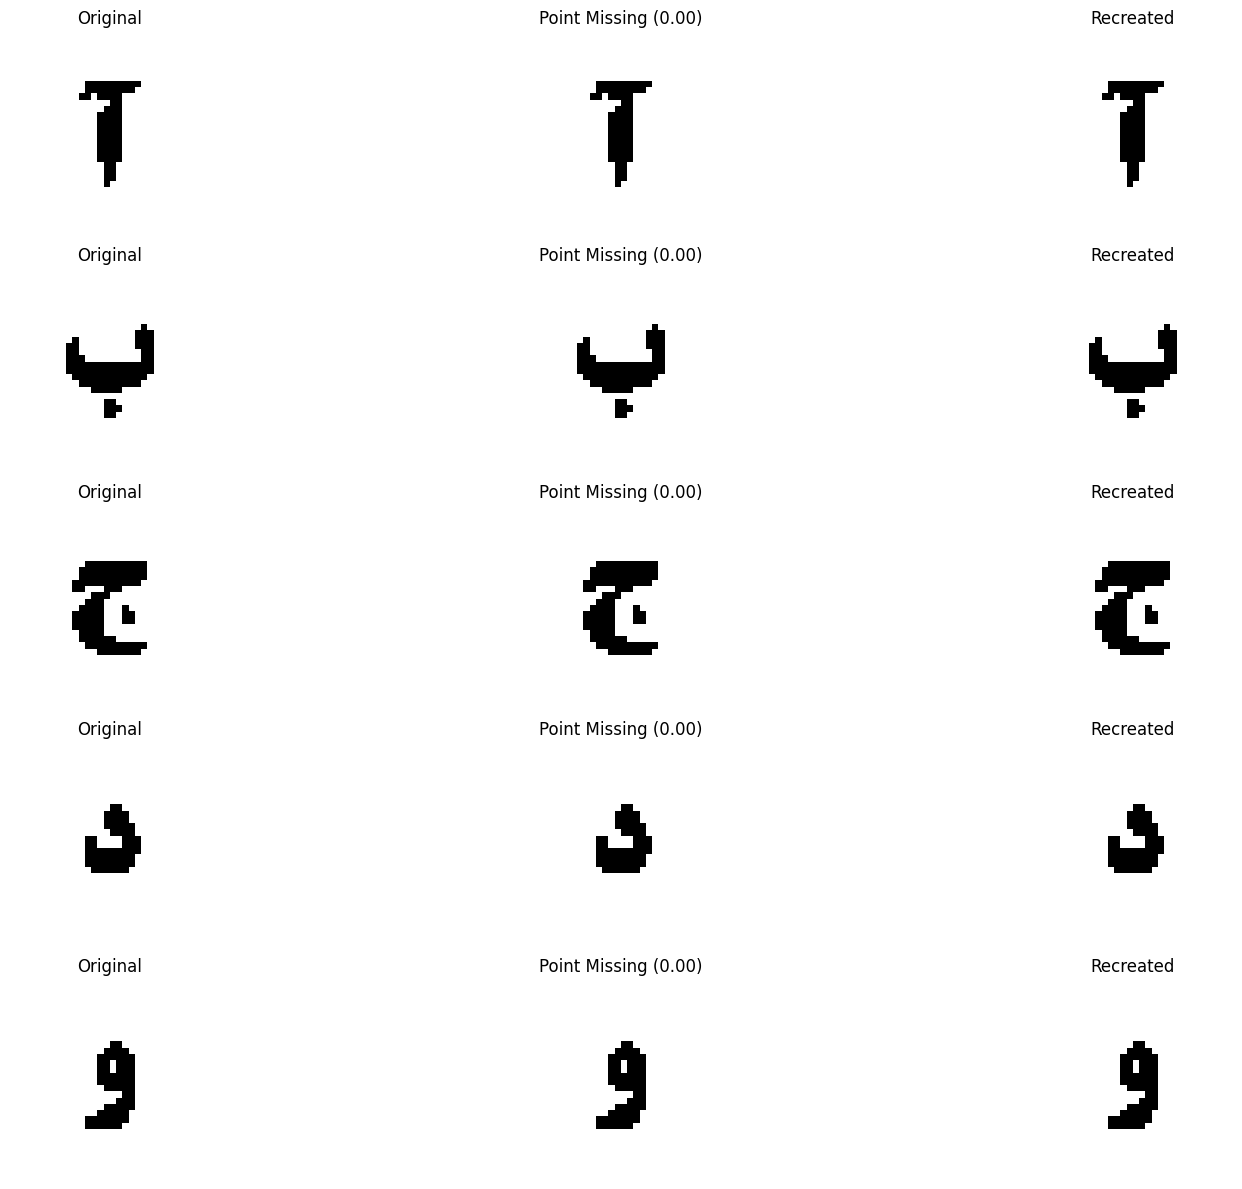

Point Missing Ratio: 0.10


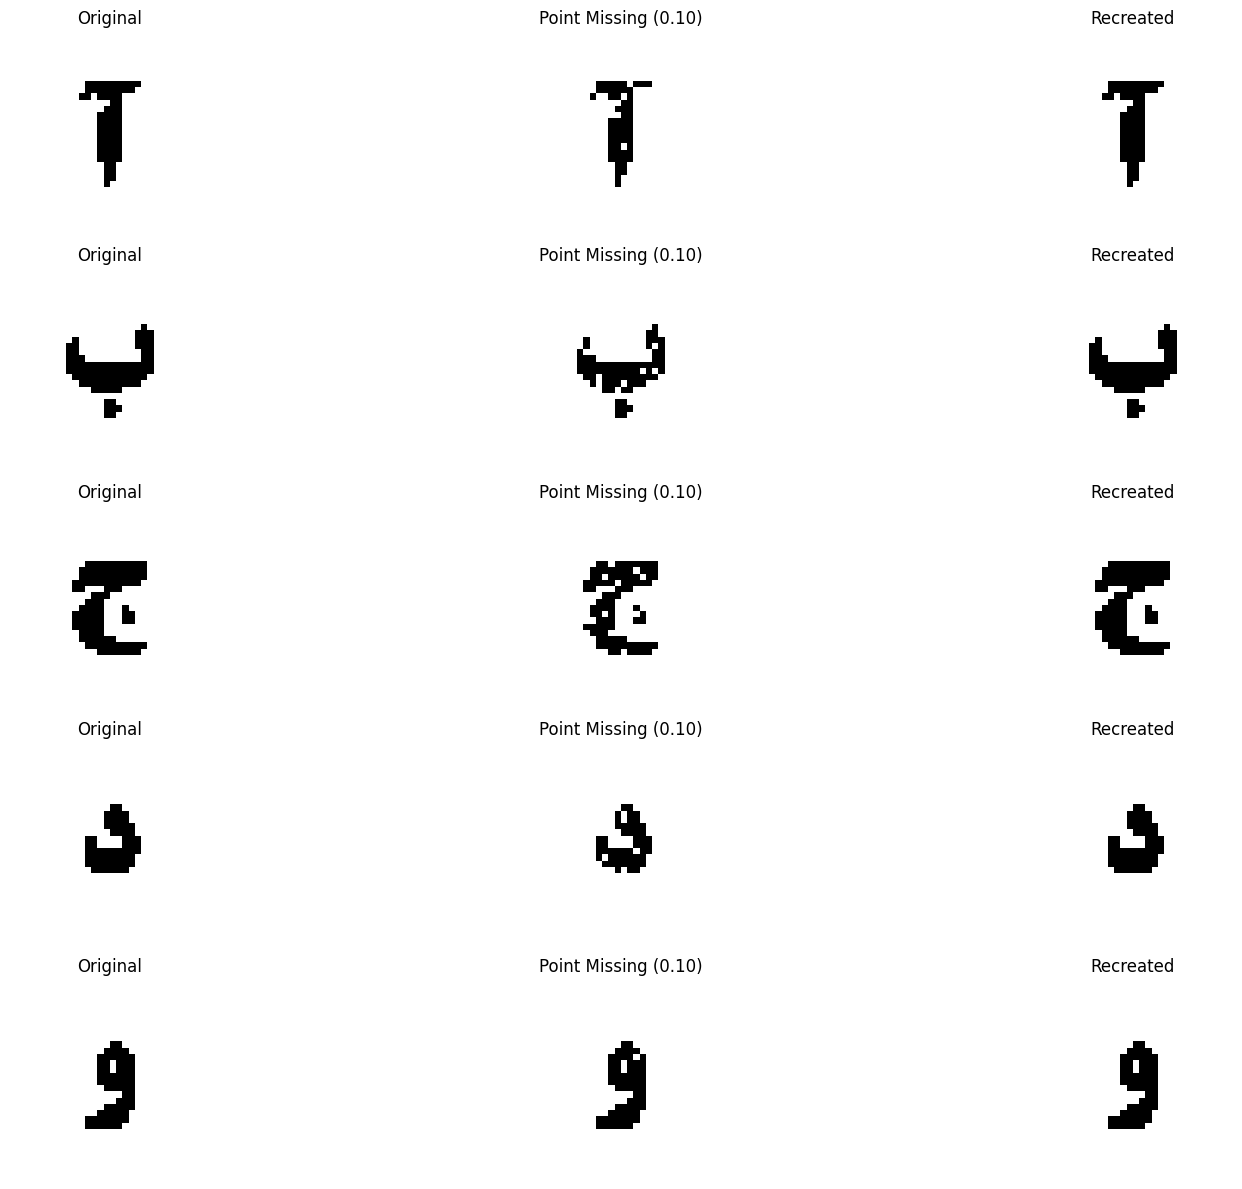

Point Missing Ratio: 0.20


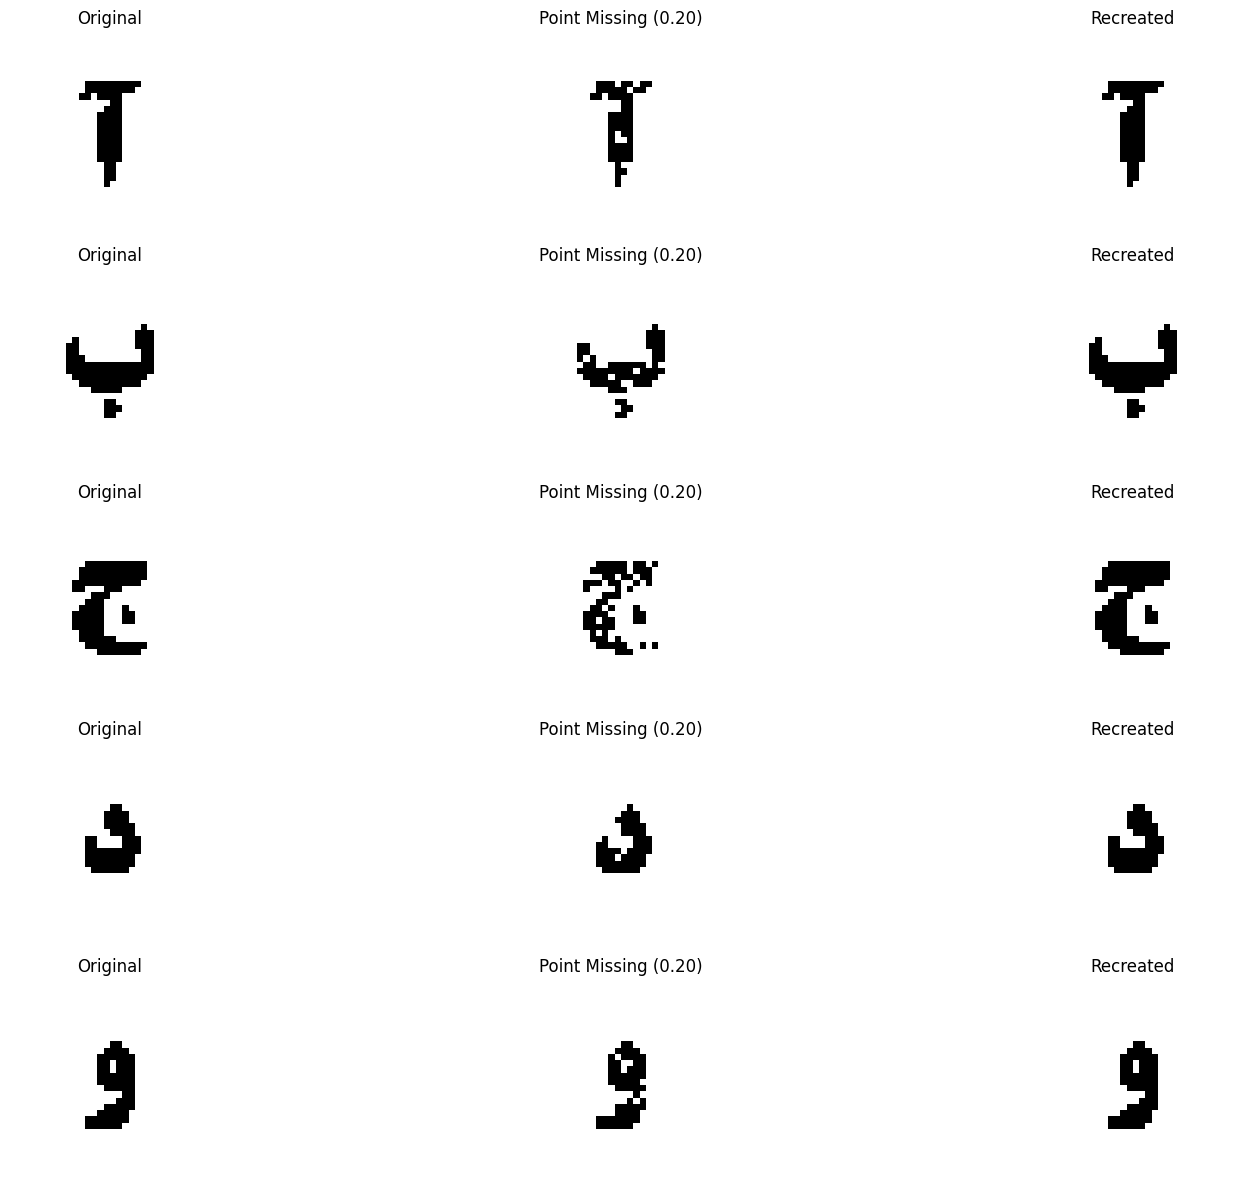

Point Missing Ratio: 0.30


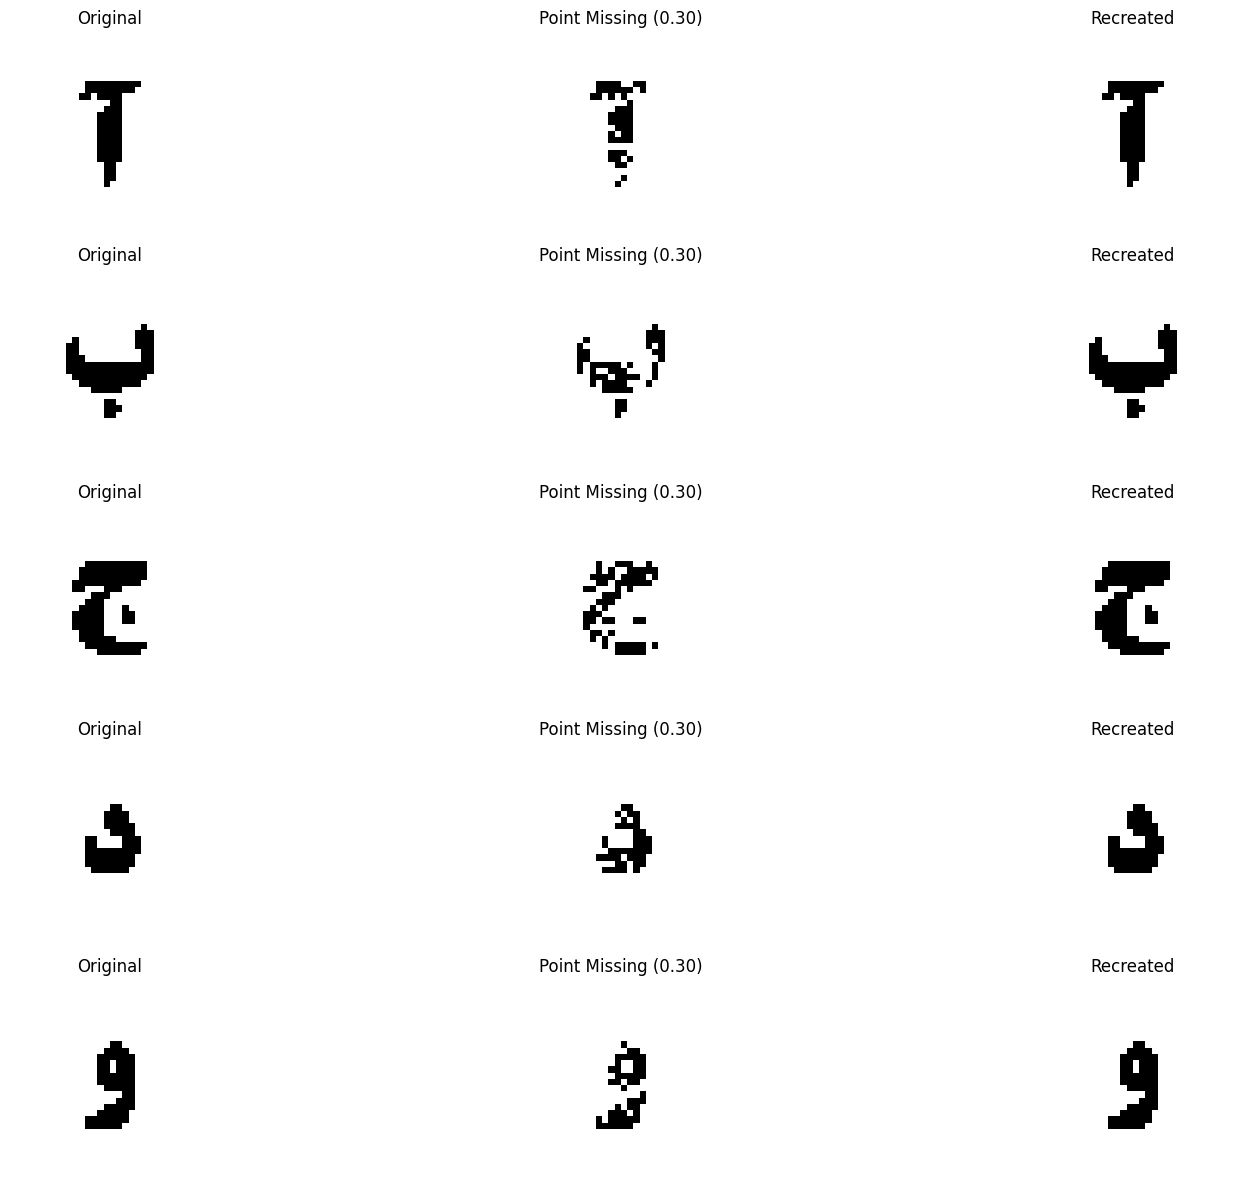

Point Missing Ratio: 0.40


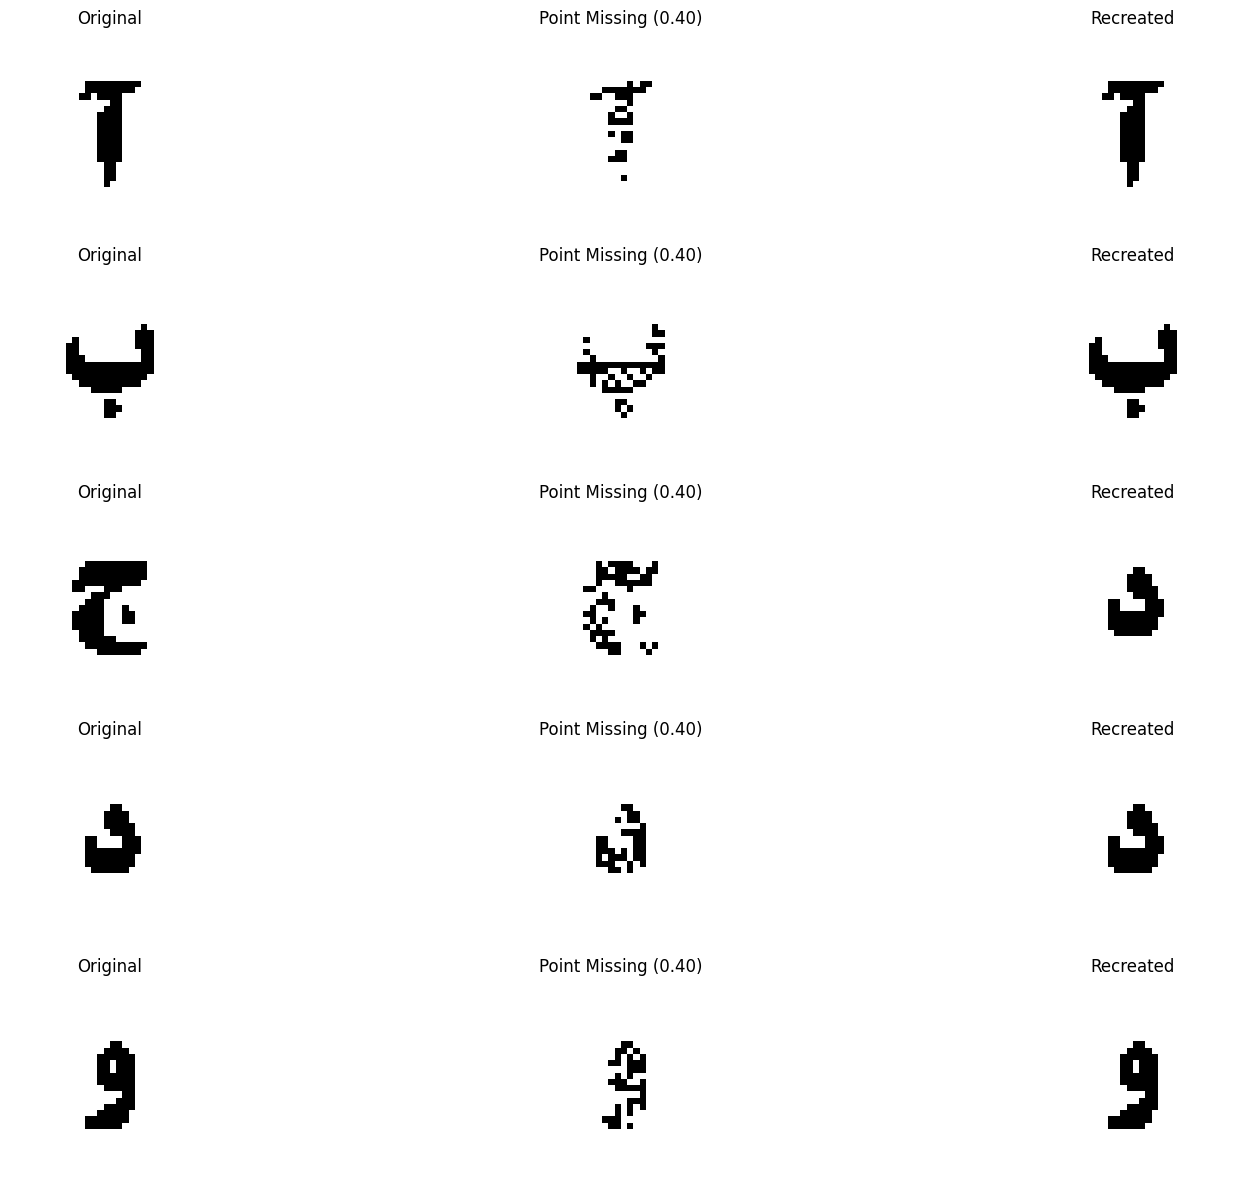

Point Missing Ratio: 0.50


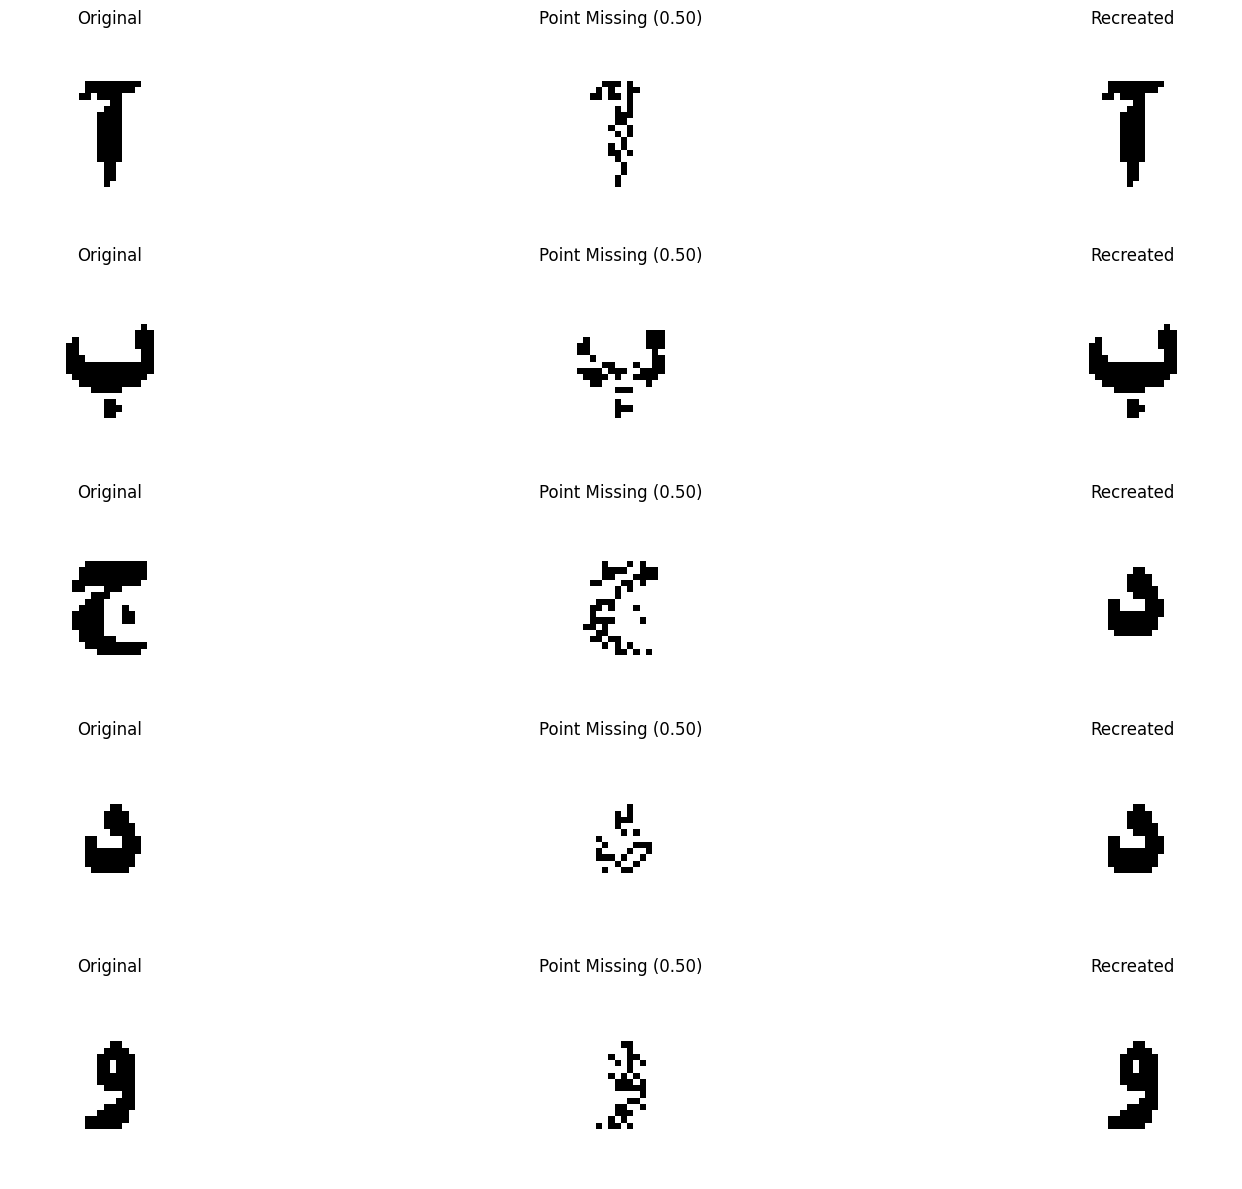

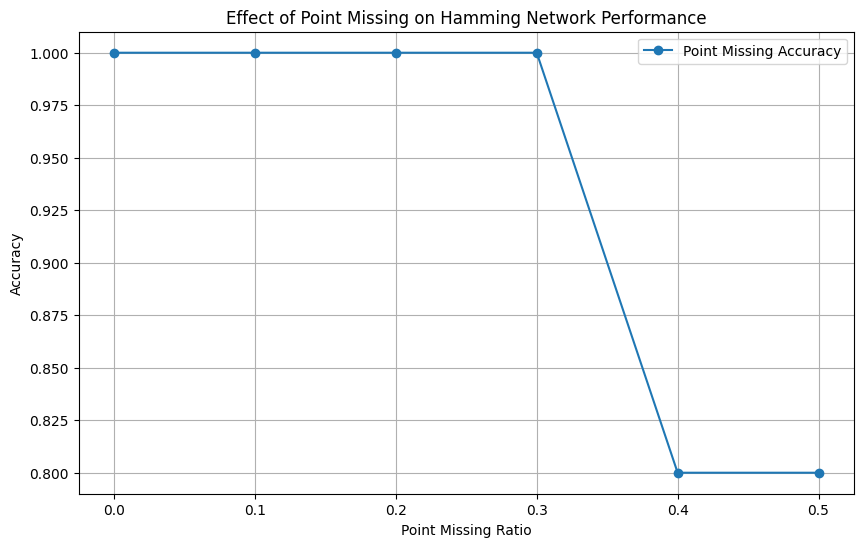

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def convert_image_to_binary(image_path):
    image = Image.open(image_path).convert("L")
    image = image.resize((32, 32))
    image_array = np.array(image)
    binary_image = np.where(image_array > 128, 1, -1)
    return binary_image

def add_noise(binary_image, noise_level):
    noisy_image = binary_image.copy()
    num_noisy_pixels = int(noise_level * binary_image.size)
    indices = np.random.choice(binary_image.size, num_noisy_pixels, replace=False)
    noisy_image.flat[indices] *= -1
    return noisy_image


def add_point_missing(binary_image, missing_ratio):
    """
    Add Point Missing by setting missing pixels to white (1).
    """
    point_missing_image = binary_image.copy()
    num_missing_points = int(missing_ratio * binary_image.size)
    indices = np.random.choice(binary_image.size, num_missing_points, replace=False)
    point_missing_image.flat[indices] = 1
    return point_missing_image


class HammingNetwork:
    def __init__(self, patterns):
        self.patterns = patterns
        self.num_patterns, self.size = patterns.shape
        self.weights = self._train()

    def _train(self):
        weights = self.patterns / 2 + 0.5
        return weights

    def recall(self, noisy_pattern):
        normalized_noisy_pattern = noisy_pattern / 2 + 0.5
        similarity = np.dot(self.weights, normalized_noisy_pattern)
        max_index = np.argmax(similarity)
        return self.patterns[max_index]


image_paths = [
    "/content/1.jpg",
    "/content/2.jpg",
    "/content/3.jpg",
    "/content/4.jpg",
    "/content/5.jpg"
]
binary_images = np.array([convert_image_to_binary(path).flatten() for path in image_paths])


hamming_net = HammingNetwork(binary_images)


missing_ratios = np.linspace(0, 0.5, 6)
accuracies_point_missing = []

for missing_ratio in missing_ratios:
    print(f"Point Missing Ratio: {missing_ratio:.2f}")

    correct_retrievals = 0
    plt.figure(figsize=(18, 12))

    for i, original_image in enumerate(binary_images):

        point_missing_image = add_point_missing(original_image, missing_ratio)
        recovered_image = hamming_net.recall(point_missing_image)

        if np.array_equal(recovered_image, original_image):
            correct_retrievals += 1

        original_image_reshaped = original_image.reshape(32, 32)
        point_missing_image_reshaped = point_missing_image.reshape(32, 32)
        recovered_image_reshaped = recovered_image.reshape(32, 32)

        plt.subplot(len(binary_images), 3, i * 3 + 1)
        plt.title("Original")
        plt.imshow(original_image_reshaped, cmap="gray")
        plt.axis("off")

        plt.subplot(len(binary_images), 3, i * 3 + 2)
        plt.title(f"Point Missing ({missing_ratio:.2f})")
        plt.imshow(point_missing_image_reshaped, cmap="gray")
        plt.axis("off")

        plt.subplot(len(binary_images), 3, i * 3 + 3)
        plt.title("Recreated")
        plt.imshow(recovered_image_reshaped, cmap="gray")
        plt.axis("off")

    accuracy = correct_retrievals / len(binary_images)
    accuracies_point_missing.append(accuracy)

    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 6))
plt.plot(missing_ratios, accuracies_point_missing, marker='o', label="Point Missing Accuracy")
plt.title("Effect of Point Missing on Hamming Network Performance")
plt.xlabel("Point Missing Ratio")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()


✅**Question #4**

part 1-7

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Layer
import tensorflow as tf

data = fetch_california_housing()
X, y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = tf.constant(gamma, dtype=tf.float32)

    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[-1]),
                                       initializer='random_normal',
                                       trainable=True)
        self.built = True

    def call(self, inputs):

        diff = tf.expand_dims(inputs, axis=1) - self.centers
        squared_diff = tf.reduce_sum(tf.square(diff), axis=-1)
        return tf.exp(-self.gamma * squared_diff)


def build_rbf_model(input_shape, rbf_units, gamma):
    inputs = Input(shape=(input_shape,))
    rbf = RBFLayer(units=rbf_units, gamma=gamma)(inputs)
    outputs = Dense(1, activation='linear')(rbf)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


def build_dense_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


rbf_model = build_rbf_model(X_train.shape[1], rbf_units=10, gamma=0.5)
print("Training RBF Model...")
rbf_history = rbf_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
rbf_loss, rbf_mae = rbf_model.evaluate(X_test, y_test)
print(f"RBF Model - Test Loss: {rbf_loss}, Test MAE: {rbf_mae}")

dense_model = build_dense_model(X_train.shape[1])
print("\nTraining Dense Model...")
dense_history = dense_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
dense_loss, dense_mae = dense_model.evaluate(X_test, y_test)
print(f"Dense Model - Test Loss: {dense_loss}, Test MAE: {dense_mae}")


if rbf_loss < dense_loss:
    print("\nThe RBF model performed better based on Test Loss.")
else:
    print("\nThe Dense model performed better based on Test Loss.")


Training RBF Model...
Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.1331 - mae: 1.6329 - val_loss: 2.5586 - val_mae: 1.1718
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4608 - mae: 1.1324 - val_loss: 1.8353 - val_mae: 0.9490
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7189 - mae: 0.9068 - val_loss: 1.4010 - val_mae: 0.8221
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3526 - mae: 0.8022 - val_loss: 1.1448 - val_mae: 0.7465
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1068 - mae: 0.7352 - val_loss: 0.9936 - val_mae: 0.7052
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9937 - mae: 0.7085 - val_loss: 0.9065 - val_mae: 0.6873
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8709 - mae: 0.6761 - val_loss: 0.8523 - val_mae: 0.6763
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8564 - mae: 0.6806 - val_loss: 0.8145 - val_mae: 0.6681
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━